In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
data = pd.read_csv("train.csv")

In [7]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
data.shape

(891, 12)

# Data Cleaning

In [14]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
(data.isna().sum()/data.shape[0])*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [19]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
data.drop(columns=["PassengerId","Name","Ticket","Cabin"],inplace=True)

In [26]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [27]:
data["Sex"].mode()[0]

'male'

In [30]:
data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [31]:
data["Age"].median()

28.0

In [34]:
data["Age"] = data["Age"].fillna(data["Age"].median())

In [35]:
data["Age"].isna().sum()

0

In [38]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [39]:
data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [42]:
data["Embarked"].mode()[0]

'S'

In [43]:
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])

In [46]:
data["Embarked"].isna().sum()

0

In [47]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [53]:
import seaborn as sns

<Axes: ylabel='Age'>

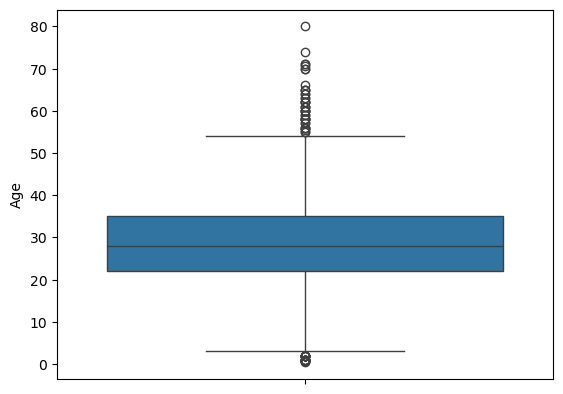

In [54]:
sns.boxplot(data["Age"])

<Axes: ylabel='SibSp'>

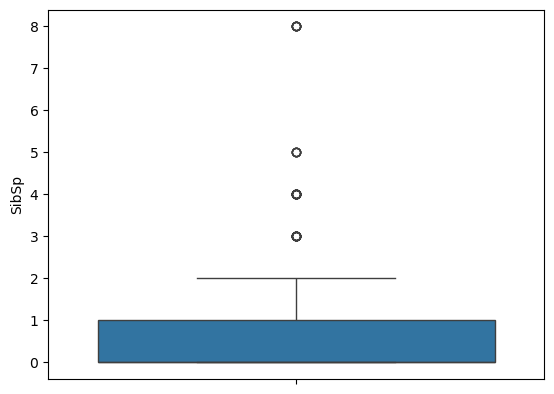

In [55]:
sns.boxplot(data["SibSp"])

<Axes: ylabel='Parch'>

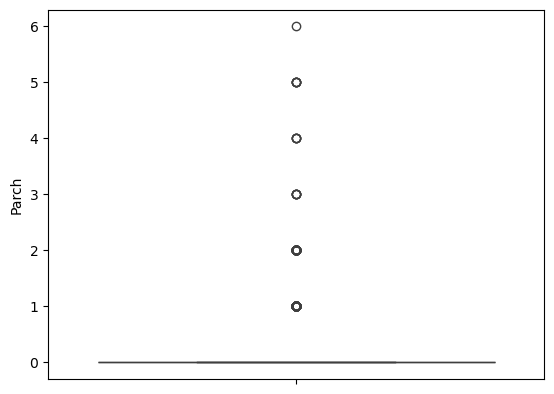

In [56]:
sns.boxplot(data["Parch"])

<Axes: ylabel='Fare'>

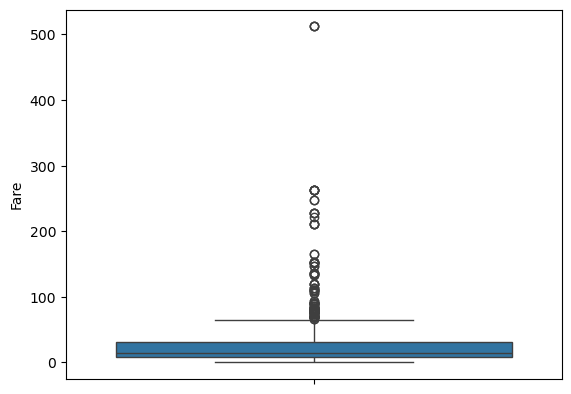

In [57]:
sns.boxplot(data["Fare"])

In [58]:
q1 = data["Age"].quantile(0.25)

In [60]:
q3 = data["Age"].quantile(0.75)

In [61]:
iqr = q3-q1

In [62]:
min_range = q1-(1.5*iqr)
mar_range = q3+(1.5*iqr)

min_range , mar_range

(2.5, 54.5)

In [63]:
data["Sex"].unique()

array(['male', 'female'], dtype=object)

In [65]:
from sklearn.preprocessing import OrdinalEncoder

In [66]:
ord_data = [['male', 'female']]

In [67]:
oe = OrdinalEncoder(categories=ord_data)

In [70]:
data["Sex"] = oe.fit_transform(data[["Sex"]])

In [81]:
data["Sex"].unique()

array([0., 1.])

In [83]:
data["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [85]:
ord_data2 = [['S', 'C', 'Q']]

In [87]:
oe = OrdinalEncoder(categories=ord_data2)

In [89]:
data["Embarked"] = oe.fit_transform(data[["Embarked"]])

In [91]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [93]:
x = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked']]

In [95]:
y = data["Survived"]

In [97]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0.0,22.0,1,0,7.2500,0.0
1,1,1.0,38.0,1,0,71.2833,1.0
2,3,1.0,26.0,0,0,7.9250,0.0
3,1,1.0,35.0,1,0,53.1000,0.0
4,3,0.0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...
886,2,0.0,27.0,0,0,13.0000,0.0
887,1,1.0,19.0,0,0,30.0000,0.0
888,3,1.0,28.0,1,2,23.4500,0.0
889,1,0.0,26.0,0,0,30.0000,1.0


In [99]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [101]:
from sklearn.model_selection import train_test_split

In [103]:
x_train , x_test , y_train , y_test = train_test_split (x,y,test_size=0.2,random_state=40)

In [106]:
from sklearn.linear_model import LogisticRegression

In [108]:
lr = LogisticRegression()

In [110]:
lr.fit(x_train , y_train)

LogisticRegression()

In [112]:
lr.score(x_test,y_test)*100

81.00558659217877

In [114]:
lr.score(x_train , y_train)*100

80.19662921348315

In [116]:
y_pred_log = lr.predict(x_test)

In [118]:
accuracy_log = accuracy_score(y_test, y_pred_log) *100
accuracy_log

81.00558659217877

In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
model_ran=RandomForestClassifier()

In [125]:
model_ran.fit(x_train, y_train)

RandomForestClassifier()

In [127]:
y_pred_ran=model_ran.predict(x_test)

In [129]:
from sklearn.metrics import  accuracy_score

In [131]:
accuracy_ran = accuracy_score(y_test, y_pred_ran) *100
accuracy_ran

82.12290502793296

In [153]:
from sklearn.neighbors import KNeighborsClassifier 

In [155]:
knn = KNeighborsClassifier(n_neighbors=7) 
  
knn.fit(x_train, y_train) 

KNeighborsClassifier(n_neighbors=7)

GaussianNB()

In [157]:
y_pred_nave = knn.predict(x_test)

In [133]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [135]:
matrix = classification_report(y_test,y_pred_log,labels=[1,0])

print('Classification report : Logistic \n',matrix)

Classification report : Logistic 
               precision    recall  f1-score   support

           1       0.78      0.78      0.78        76
           0       0.83      0.83      0.83       103

    accuracy                           0.81       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.81      0.81       179



In [137]:
matrix = classification_report(y_test,y_pred_ran,labels=[1,0])
print('Classification report : Random Forest\n',matrix)

Classification report : Random Forest
               precision    recall  f1-score   support

           1       0.81      0.75      0.78        76
           0       0.83      0.87      0.85       103

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [139]:
import matplotlib.pyplot as plt

In [159]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_nave )
# Print the accuracy score
print("Accuracy Score:", accuracy)

Accuracy Score: 0.7206703910614525
